# 1. Overview

## 1.1. Basic concepts

### Nodes and edges
Going back to familiar binary Logistic Regression, we visualize, let's say, a model trained on the dataset having 3 features and a single label. On the graph, each feature/label ($\mathbf{x}$ or $\mathbf{y}$) is represented by a *node* and each model weight ($w_1,w_2,w_3$) is represented by a *colored edge*. The bias $w_0$ (or sometimes denoted $b$) is not showing on the graph, but keep in mind it is attached to the output node. This is the most basic architecture of a Neural Network with 4 parameters (3 weights + 1 bias).

<img src='image/mlp_linear_simple.png' style='height:180px; margin:20px auto;'>

### Layers
Now, we extend the problem to a Stacking model, where 5 base models and the meta model are all Logistic Regression. Beside an input layer and an output layer, there is a new layer between them, called the *hidden layer*. We can add more and more hidden layers for multilevel stacking design. By doing this, our Neural Network becomes *deeper* and can capture more complicated relationship in our data. This opens up a new branch of Machine Learning algorithms: Deep Learning.

<img src='image/mlp_linear_stacking.png' style='height:300px; margin:20px auto;'>

### Representation learning
In the two examples above, the Neural Network is designed for a binary classification problem, where the target is a vector storing the probabilities of being classified to the positive class. For a multi-class classification problem, we need to contruct a vector of probabilities for each class. Below is an example Neural Network architecture with 2 hidden layers for the Iris data which has 4 features and 3 classes.

<img src='image/mlp_iris.png' style='height:300px; margin:20px auto;'>

This type of architecture is generally called Deep Neural Network of Multilayer Perceptron. Notice that each node represents a vector, we can think of nodes in the hidden layers as *latent features*, as they are automatically discovered by Deep Neural Networks. Such an approach is called [representation learning], one of the benefits that Multilayer Perceptron offer.

[representation learning]: https://en.wikipedia.org/wiki/Feature_learning

### Notation
In the Iris example above, the network can be formally written in matrix notation as follows:

$$\begin{aligned}
\mathbf{H}^{(1)} &= \phi^{(1)}\left(\mathbf{X}\mathbf{W}^{(1)}+\mathbf{b}^{(1)}\right) \\
\mathbf{H}^{(2)} &= \phi^{(2)}\left(\mathbf{H}^{(1)}\mathbf{W}^{(2)}+\mathbf{b}^{(2)}\right) \\
\hat{\mathbf{Y}}=\mathbf{H}^{(3)} &= \phi^{(3)}\left(\mathbf{H}^{(2)}\mathbf{W}^{(3)}+\mathbf{b}^{(3)}\right) \\
\end{aligned}$$

- $\mathbf{X}$ and $\mathbf{Y}$ are the matrices in the input and output layers.
- $\mathbf{H}^{(l)}$ ($l=1,2,\dots,L$) is the matrix in the layer number $l$. In this case, $L=3$ indicates there are 3 feedforward layers.
- $\mathbf{W}^{(l)}$ and $\mathbf{b}^{(l)}$ are the matrix of weights and the vector of biases that fire information from the layer $l-1$ to the layer $l$.

To make things easier to catch up, let's take a look at the size of some matrices (we denote $N$ the sample size):
$\mathbf{X}\in\mathbb{R}^{N\times4},$
$\mathbf{W}^{(1)}\in\mathbb{R}^{4\times6},$
$\mathbf{b}^{(1)}\mathbf{1}^\text{T}\in\mathbb{R}^{N\times6},$
$\mathbf{H}^{(1)}\in\mathbb{R}^{N\times6}$.

### Inspiration
Now we have known what a Deep Neural Network is, but what does the term *neural* implies here? This is because Neural Nets are inspired by biological neural network that constitute human brains. Artificial Neural Networks are constructed by nodes and edges, which resemble *neurons* and *synapses* in biological brains. An artificial neuron recieves signals, processes them and transmits it to other neurons. The strength of a signal between neurons is modeled by the weight of an edge. Biological nervous system in fact is much more complicated, and Artificial Neural Network is just a simple counterpart.

### Sizing
The first thing to notice when constructing a Neural Network is the shape of each layer. Let's take a look at the first hidden layer: it has the shape of (None, 6). This means, this layer is a matrix with 6 columns and an unspecified number of rows. In other words, the architecture of the Neural Network is fixed, but it can adapts to any data size.

Another important thing is the number of parameters (weights and biases). A large number of parameters leads to high training time and overfitting. Here are the numbers of parameters for each layer:
- Layer 1: $4\times6=24$ weights and $6$ biases for a total of $30$ parameters
- Layer 2: $6\times6=36$ weights and $6$ biases for a total of $42$ parameters
- Layer 3: $6\times3=18$ weights and $3$ biases for a total of $21$ parameters

## 1.2. Loss function
Loss function is a compulsory component in some Machine Learning models, it tells the model how far it is from the predicted values to the ground truth and guides the optimization to go to the appropriate direction. However, traditional Machine Learning (implemented in frameworks such as Scikit-learn) seems don't pay too much attention on loss function: algorithms always go for squared errors in regression and negative log likelihood in classification, as well as don't have an option to customize it.

Modern Machine Learning (Deep Learning and Tree Boosting) frameworks allow us to select from a wide range of loss functions. In this section, we are going through the most popular choices. They are generally denoted $\mathcal{L}$. Loss functions are found in [TensorFlow] or [TensorFlow Addons].

[TensorFlow]: https://www.tensorflow.org/api_docs/python/tf/keras/losses
[TensorFlow Addons]: https://www.tensorflow.org/addons/api_docs/python/tfa/losses

### Cross Entropy
[Cross Entropy] is the most popular loss function used in classifcation problems. It is a concept originally defined in information theory to compute how close two distributions of a random variables are. When applied in classification, two distributions refer to the true label $\mathbf{y}$ and the predicted label $\hat{\mathbf{y}}$, given by the formula:

$$\text{CrossEntropy}(\hat{\mathbf{y}},\mathbf{y})
=-\sum_{n=1}^{N}{y_n\log\hat{y}_n}$$

In practice, trying to reach two boundaries $0$ and $1$ as close as possible for every observation seems impossible. A regularization technique called *label smoothing* has been proposed to prevent overconfidence by pulling two boundaries closer. With a pre-defined weight factor $\epsilon$ and the number of classes $K$, it replaces the true label $\mathbf{y}$ with:

$$y_n\leftarrow(1-\epsilon)y_n+\frac{\epsilon}{K}$$

[Cross Entropy]: https://en.wikipedia.org/wiki/Cross_entropy

When implementing in TensorFlow, we may use several variants for different scenarios:
- <code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy'>BinaryCrossentropy</a></code>
is for binary classification, when the label is the probability of the positive class. It is recommended to use it either with Sigmoid activation function in the output layer, or with the *from_logit* parameter set to *True*.
- <code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryFocalCrossentropy'>BinaryFocalCrossentropy</a></code>
has the same usecase as binary cross entropy, but is useful when the label is significantly imbalanced.
- <code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy'>CategoricalCrossentropy</a></code>
is for multi-class classification, when the label is one-hot encoded. It is recommended to use it either with Softmax activation function in the output layer or with the *from_logit* parameter set to *True*.
- <code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy'>SparseCategoricalCrossentropy</a></code> is also for multi-class classfication, but the label is integer encoded.


### KL Divergence
[Kullback-Leibler Divergence] is an alternative to Cross Entropy, it simply minus the [Entropy] of the target from the Cross Entropy. In practice, minimizing KL Divergence, Cross Entropy and Negative Log Likelihood (Log Loss) are all the same. Here is the formula of KL Divergence:

$$\begin{aligned}
\text{KLDivergence}(\hat{\mathbf{y}},\mathbf{y})
&= -\sum_{n=1}^{N}{y_n\log\frac{\hat{y}_n}{y_n}} \\
&= -\sum_{n=1}^{N}{y_n\log\hat{y}_n} + \sum_{n=1}^{N}{y_n\log\hat{y}} \\
& = \text{CrossEntropy}(\hat{\mathbf{y}},\mathbf{y}) - \text{Entropy}(\mathbf{y}) \\
\end{aligned}$$

[Kullback-Leibler Divergence]: https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
[Entropy]: https://en.wikipedia.org/wiki/Entropy_(information_theory)

## 1.3. TensorFlow and Keras
[TensorFlow] is one of the most popular Deep Learning framework released in 2015, but it focuses on computation and thus have a low-level API. [Keras], in the other hand, is a high-level, easy-to-use framework with multiple backends (TensorFlow, Theano and CNTK). In the late 2019 to 2020, [Keras 2.4] was released as a part of [TensorFlow 2.0] and stopped supporting other backends. In this topic, we are going to use 
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras'>tensorflow.keras</a></code>
to construct a Neural Network for the Iris example above.

[TensorFlow]: https://www.tensorflow.org/api_docs
[Keras]: https://keras.io/about/
[Keras 2.4]: https://github.com/keras-team/keras/releases/tag/2.4.0
[TensorFlow 2.0]: https://blog.tensorflow.org/2019/09/tensorflow-20-is-now-available.html

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Interfaces
There are two APIs that Keras supports: sequential and functional. In sequential interface, each layer has exactly one input tensor and one output tensor. We use a
<code style='font-size:13px'><a href=https://www.tensorflow.org/api_docs/python/tf/keras/Sequential>Sequential</a></code>
to add [layers] successively to the network. There are so many types of layer, but we will start with the most basic one,
<code style='font-size:13px'><a href=https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense>Dense</a></code>
(also known as Fully Connected), indicating all nodes from the previous layers connect to the next layer. In the example below, we initialize the network with the first two layers, then add the rest.

[layers]: https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [12]:
model = keras.Sequential([
    layers.Input(shape=4),
    layers.Dense(units=6),
])
model.add(layers.Dense(units=6))
model.add(layers.Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 30        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 3)                 21        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


Functional interface builds a *graph of layers*, allow us to manipulate layers that are not connect sequentially.

In [15]:
layerInput = layers.Input(shape=4)
layerHidden = layers.Dense(6)(layerInput)
layerHidden = layers.Dense(6)(layerHidden)
layerOutput = layers.Dense(3, activation='softmax')(layerHidden)

model = keras.Model(inputs=layerInput, outputs=layerOutput)
model.compile(loss='categorical_crossentropy')

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_19 (Dense)            (None, 6)                 30        
                                                                 
 dense_20 (Dense)            (None, 6)                 42        
                                                                 
 dense_21 (Dense)            (None, 3)                 21        
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


### Implementation
Once the model architecture is built, we use the
<code style='font-size:13px'><a href=https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile>compile()</a></code>
method to specify the loss function, the optimization algorithm and evaluation metrics for our network. At this step, the model is ready to use by calling the
<code style='font-size:13px'><a href=https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit>fit()</a></code>
method.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [59]:
x = np.array([1,2,3,4,5])
y = 2*x

In [60]:
model = keras.Sequential([
    layers.Input((1)),
    layers.Dense(4, activation='linear'),
    layers.Dense(1),
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(x, y, epochs=10000, verbose=0)

In [61]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 4)                 8         
                                                                 
 dense_50 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.predict(x)

1/1 [==============================] - 0s 44ms/step


array([[2.       ],
       [3.9999998],
       [6.       ],
       [8.       ],
       [9.999999 ]], dtype=float32)

# 2. Activation functions
So far, we have already known a Deep Neural Network is simply the combination of many Logistic Regression models. But if we keep stacking up linear functions, the result is still a linear function. In other words, using multiple linear layers is the same as using a single linear layer. To go beyonds linearity, an [activation function] is added to each layer. These special functions *activate* non-linearity for layers, so that our Neural Network can model complicated relationship in the data. Activation functions are generally denoted $\phi(x)$.

There are several aspects should be considered when choosing the appropriate activation function:
- no gradient vanishing
- zero-centered
- computational cost
- differentiable

In Keras, popular activation functions can either be used through an [activation layer], or through the [activation parameter] supported by all forward layers. Each function of the second type has a string identifier. More advanced activation functions can be found in the add-on module of TensorFlow via
<code style='font-size:13px'><a href='https://www.tensorflow.org/addons/api_docs/python/tfa/activations'>tfa.activations</a></code>.

[activation function]: https://en.wikipedia.org/wiki/Activation_function
[Activation layer]: https://keras.io/api/layers/activation_layers/
[activation parameter]: https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [2]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 2.1. S-curves

### Sigmoid
$$\text{Sigmoid}(x)=\frac{1}{1+e^{-x}}$$

The [sigmoid function] returns a value in the interval $(0,1)$, thus it can be used in the output layer of binary classification problems to convert logits into probabilties. The Sigmoid function uses to be popular in the past due to its nice representation. However, it is rarely used nowadays due to these drawbacks:
- *It kills gradients*. An undesired property of Sigmoid is that it *saturates* at two tails (it approaches $0$ and $1$). If a node falls into these regions, its gradient is almost $0$ and it fires almost no signal to the next node. This problem is also known as *gradient vanishing*.
- *It is not zero-centered*. The output value of Sigmoid function is always positive, making the training process unstable and take more steps than needed to converges.
- *It is expensive*. This is because the computation of exponents is costly.

[sigmoid function]: https://en.wikipedia.org/wiki/Sigmoid_function

### Hard Sigmoid
$$\text{HardSigmoid}(x)=
\begin{cases}
    0 &\; \text{if }x<-a \\
    x/2a+0.5 &\; \text{if }-a\leq x<a \\
    1 &\; \text{if }x\geq a
\end{cases}
$$

Hard Sigmoid is a piecewise function with a parameter $a$. The original paper uses $a=1$, Keras uses $a=2.5$ while Torch uses $a=3$. This function is very close to Sigmoid, but is significantly faster. Use this function carefully as it may cause large errors in regression problems.

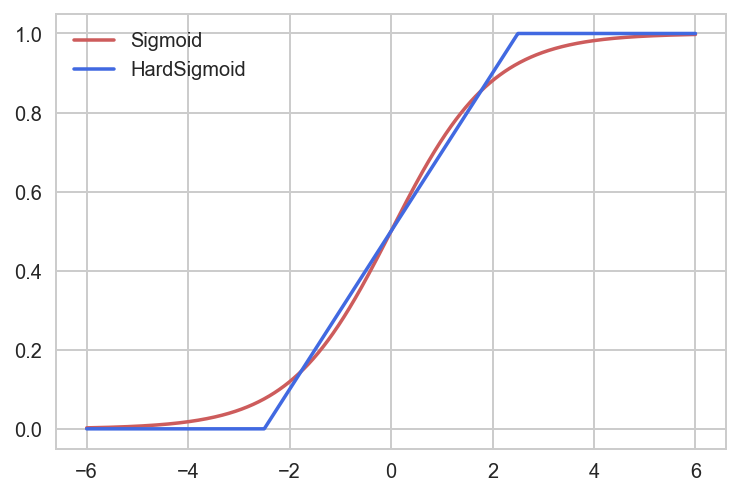

In [18]:
x = tf.linspace(-6, 6, 1000)
y1 = keras.activations.sigmoid(x)
y2 = keras.activations.hard_sigmoid(x)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1, 'indianred', label='Sigmoid')
ax.plot(x, y2, 'royalblue', label='HardSigmoid')
ax.legend()
plt.show()

### Softmax
The [softmax function] is a more generalized form of the sigmoid, it converts data in a row into probabilities (be positive and sum up to $1$), using the formula:

$$\text{Softmax}(x_d)=\frac{\exp{(x_d)}}{\sum_{d=1}^{D}{\exp{(x_d)}}}$$

where $D$ is the number of nodes in a layer. Softmax treats input values as log-odds, and can be used in the last layer of multiclass classification problems.

[softmax function]: https://en.wikipedia.org/wiki/Softmax_function

In [136]:
layer = keras.activations.softmax
x = tf.random.normal(shape=(100,3))
y = layer(x)
y[:10].numpy()

array([[0.6604, 0.1115, 0.2281],
       [0.0924, 0.4246, 0.483 ],
       [0.1463, 0.3795, 0.4742],
       [0.4801, 0.357 , 0.1629],
       [0.4771, 0.3065, 0.2164],
       [0.3281, 0.3926, 0.2793],
       [0.1052, 0.2064, 0.6884],
       [0.3203, 0.5797, 0.1   ],
       [0.2061, 0.2349, 0.5591],
       [0.1831, 0.2805, 0.5364]], dtype=float32)

### Tanh

$$\text{Tanh}(x)=\frac{{{e^x} - {e^{-x}}}}{{{e^x} + {e^{-x}}}}$$

Hyperbolic tangent (tanh) is another S-shaped function. It outputs values in the interval $(-1,1)$ rather than $(0,1)$ and is zero-centered. Tanh is also rarely used because the domain $(-3,3)$ before the function approaches $-1$ and $1$ is quite small.

### Softsign

$$\text{Softsign}(x)=\frac{x}{|x|+1}$$

Softsign is very much like Tanh, but it *saturates* much slowlier.

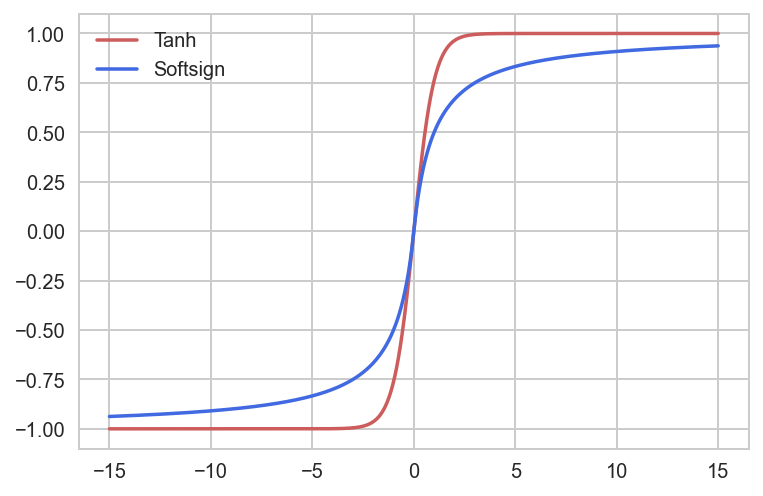

In [21]:
x = tf.linspace(-15, 15, 1000)
y1 = keras.activations.tanh(x)
y2 = keras.activations.softsign(x)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1, 'indianred', label='Tanh')
ax.plot(x, y2, 'royalblue', label='Softsign')
ax.legend()
plt.show()

## 2.2. Rectifiers
The term *rectifier* is taken from electrical engineering.

### ReLU
$$
\text{ReLU}(x)=\max{(0,x)}=
\begin{cases}
    0 &\;\text{if }x<0 \\
    x &\;\text{if }x\geq0 \\
\end{cases}
$$

[Rectified Linear Unit] (ReLU) was first used as an activation function in 2010. It comes to solve the problem that all S-shaped functions suffer from: gradient vanishing. ReLU is also very simple in computing, making it a very popular choice in the world of Deep Learning. It is recommended for Data Scientists to start with ReLU in their Neural Networks.

But ReLU is not perfect, as it's has a significant problem: *dead neurons*, or *dying ReLU*. This problem occurs when a neuron takes nagative input and returns $0$, making it inactive and the weights attached to it will never be updated. This issue is likely to be caused by large negative biases and high learning rate.  To effectively tackle this problem, many improved version of ReLU has be proposed. Below is a quick recap of ReLU and its modified versions, they are going to be discussed later.

[Rectified Linear Unit]: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

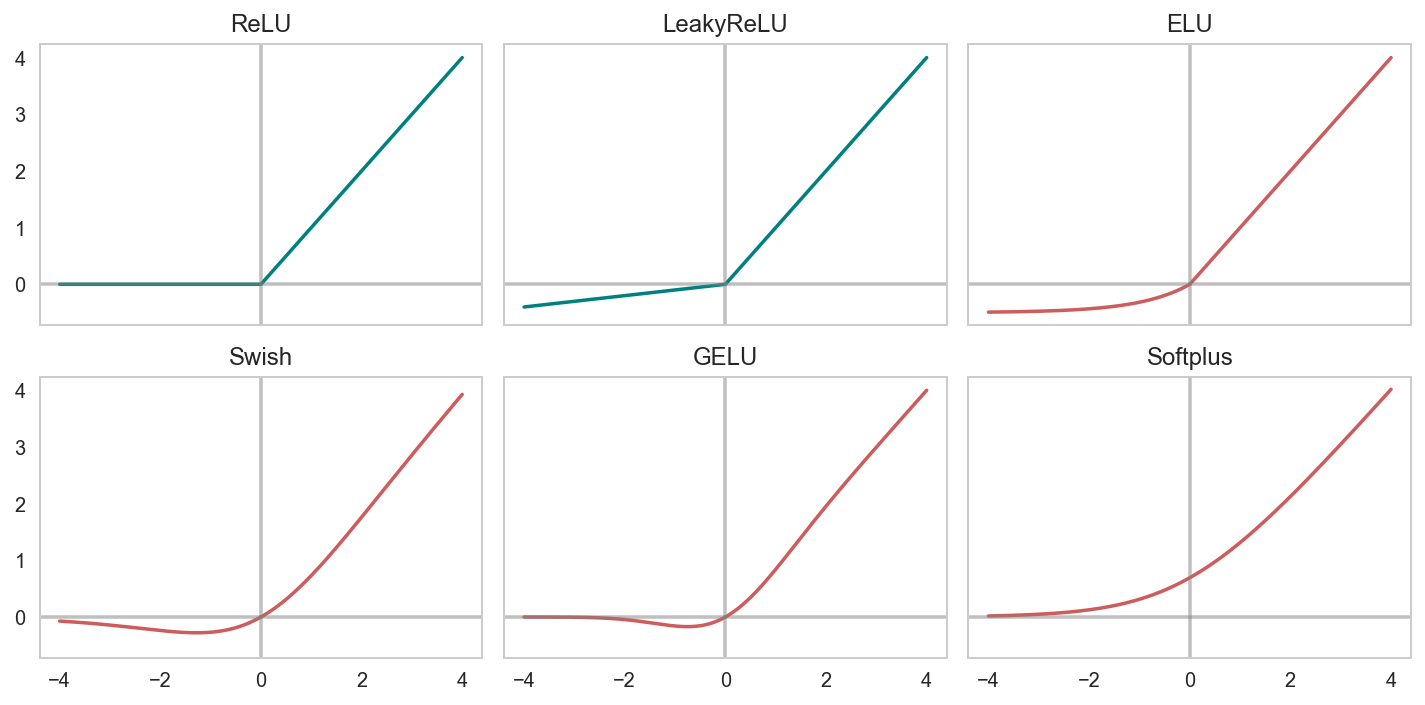

In [35]:
x = tf.linspace(-4, 4, 1000)
yRelu = keras.activations.relu(x)
yLeakyRelu = keras.layers.LeakyReLU(alpha=0.1)(x)
yElu = keras.layers.ELU(alpha=0.5)(x)
yGelu = keras.activations.gelu(x)
ySoftplus = keras.activations.softplus(x)
ySwish = keras.activations.swish(x)
yRelu6 = tf.nn.relu6(x)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5), sharex=True, sharey=True, tight_layout=True)
ax[0,0].plot(x, yRelu, 'teal')
ax[0,0].set_title('ReLU')

ax[0,1].plot(x, yLeakyRelu, 'teal')
ax[0,1].set_title('LeakyReLU')

ax[0,2].plot(x, yElu, 'indianred')
ax[0,2].set_title('ELU')

ax[1,0].plot(x, ySwish, 'indianred')
ax[1,0].set_title('Swish')

ax[1,1].plot(x, yGelu, 'indianred')
ax[1,1].set_title('GELU')

ax[1,2].plot(x, ySoftplus, 'indianred')
ax[1,2].set_title('Softplus')

for axi in ax.flatten():
    axi.axvline(x=0, color='grey', alpha=0.5)
    axi.axhline(y=0, color='grey', alpha=0.5)
    axi.grid(False)

plt.show()

### LeakyReLU
$$
\text{LeakyReLU}(x)=
\begin{cases}
    \alpha x &\;\text{if }x<0 \\
    x &\;\text{if }x\geq0 \\
\end{cases}
$$

Here, $\alpha$ is a tunable hyperparameter, usually $\alpha\leq0.3$. Proposed in 2012, this leaky version of ReLU allows a small fraction of $x$ to be kept in the negative zone, preventing *dying ReLU*. This is because LeakyReLU gives dead neurons a chance to recover. This function inherits fast computation from ReLU, can be considered a alternative choice who has shown improved performance in various tasks.

### ELU
$$
\text{ELU}(x)=
\begin{cases}
    \alpha(e^x-1) &\; \text{if }x<0 \\
    x             &\; \text{if }x\geq0 \\
\end{cases}
$$

ELU (Exponential Linear Unit) is another modified version of ReLU proposed in 2015, it uses an exponential function in the negative region. This function saturates for very large negative values (it approaches $\alpha$), allowing them to be essentially inactive. Thus, $\alpha$ controls the degree of saturation: higher values of it mean more room before convergence. Both Keras and Torch implements ELU with $\alpha=1$. A disadvantage of ELU is that it is slow due to the computation of exponents.

### Swish
$$\text{Swish}(x)=x\sigma(x)=\frac{x}{1+e^{-x}}$$

$$\text{SiLU}(x)=x\sigma(\beta x)=\frac{x}{1+e^{-\beta x}}$$

Swish, also known as a special case SiLU (Sigmoid Linear Unit) where $\beta=1$, proposed in 2017 by Google Brain. It is [bounded] below (enables sparsity), unbounded above (avoids gradient vanishing) and [non-monotonic] (increases expressivity). This self-gating activation function has shown impressive performance accross a wide range of tasks.

However, like other *smooth* curves, Swish is slower compared to other simple variants such as LeakyReLU because of the involving of the Sigmoid function in its computation. HardSwish, a variant of Swish has been proposed to add *hardness* and thus reduce computational cost.

$$
\text{HardSwish}(x)= x\frac{\text{ReLU6}(x+3)}{6} =
\begin{cases}
    0        &\; \text{for }x<-3 \\
    x(x-3)/6 &\; \text{for }-3\leq x<3 \\
    1        &\; \text{for }x\geq3 \\
\end{cases}
$$

where $\text{ReLU6}(x)$ is another activation function, it clips $x$ at two boundaries $0$ and $6$.

[bounded]: https://en.wikipedia.org/wiki/Bounded_function
[non-monotonic]: https://en.wikipedia.org/wiki/Monotonic_function

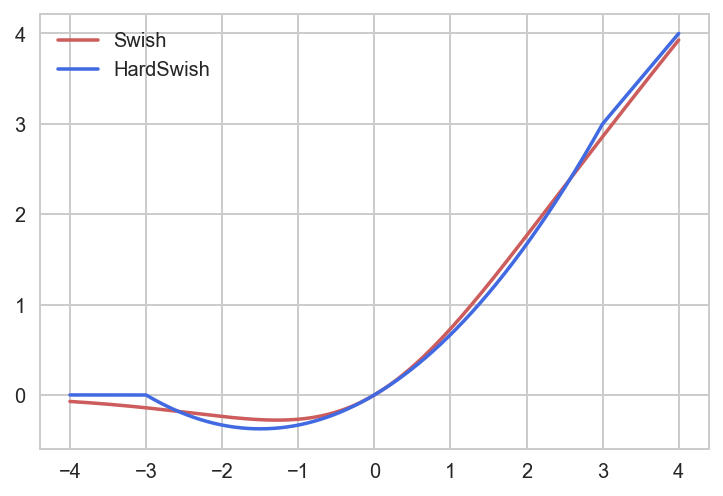

In [50]:
from tensorflow.nn import relu6
from tensorflow.keras.activations import swish
hswish = lambda x: x * relu6(x+3) / 6

x = tf.linspace(-4, 4, 1000)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, swish(x), 'indianred', label='Swish')
ax.plot(x, hswish(x), 'royalblue', label='HardSwish')
ax.legend()
plt.show()

### GELU
$$\begin{aligned}
\text{GELU}(x)
&= x\,\text{Pr}(x>z)\quad\text{for }z\sim\mathcal{N}(0,1) \\
&\approx x\sigma(1.702x)
\end{aligned}$$

Gaussian Error Linear Unit (GELU), introduced in 2016, seems to be state-of-the-art in NLP, specially in Transformer models. It uses the survival function of standard normal distribution (the first equation), which is computationally expensive. Thus, an approximation is proposed (second equation), which is a SiLU function with $\beta=1.702$.

### Softplus
$$\text{Softplus}(x)=\log(1+e^x)$$

This function is the anti-derivative of the Sigmoid function, thus it has a very smooth gradient, which is one of its biggest advantages. Unlike other Linear Unit functions, Softplus doesn't go through the origin.

### PReLU
PReLU (Parametric ReLU) has exactly the same function form as LeakyReLU, but it considers $\alpha$ a *learnable* parameter instead of a *tunable* hyperparameter. In other words, $\alpha$ is neuron-level adaptive, giving a very high flexibility to our Neural Network. This method is vital to the success of Deep Learning.

In [180]:
model = keras.Sequential([
    layers.Input(shape=4),
    layers.Dense(units=6),
    layers.LeakyReLU(),
    layers.Dense(units=6),
    layers.PReLU(),
])

model.compile(loss='categorical_crossentropy')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 6)                 30        
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 6)                 0         
                                                                 
 dense_23 (Dense)            (None, 6)                 42        
                                                                 
 p_re_lu (PReLU)             (None, 6)                 6         
                                                                 
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


# 3. Backpropagation
Like Linear/Logistic Regression, Multilayer Perceptron also uses Gradient Descent to optimize its parameters, which requires partial derivative of the loss function with respect to each parameter. However, the number of weights and biases in a Neural Network is huge and they are organized in a hierachical architecture, making calculating their derivatives very expensive.

This is where [backpropagation] comes to the rescue, an algorithm dedicated to make the computation of partial derivatives in Neural Network feasible and tractable. This algorithm is key to the success of modern Deep Learning.

[backpropagation]: https://en.wikipedia.org/wiki/Backpropagation

## 3.1. Chain rule
[Chain rule] is a technique to calculate the derivatives of a [composition] of function. It is especially useful when we stack multiple functions to a variable (do you see the relationship with Neural Networks here?), as it allows us to compute each derivative separately and then combine them later. We can think of it as [divide and conquer] strategy. Let's dive into examples.

[Chain rule]: https://en.wikipedia.org/wiki/Chain_rule
[composition]: https://en.wikipedia.org/wiki/Function_composition
[divide and conquer]: https://en.wikipedia.org/wiki/Divide_and_rule

### Univariable
In the simple form of chain rule, the function looks like this: $y=f(g(h(x)))$. It may look nasty, but luckily, it is much easier when we look at an example, $y=\sin^2(5x)$. We can decompose it into a sequence of functions, visuaized as a graph like this:

$$\begin{aligned}
y &= f(u)=u^2 \\
u &= g(v)=\sin(v) \\
v &= h(x)=5x \\
\end{aligned}$$

<img src='image/function_composition_univariable.png' style='width:360px; margin:10px auto;'>

By computing $f'(u)$, $g'(v)$ and $h'(x)$ (which is very simple and is not what we are going to do here), the derivative of $y$ with respect to $x$ is calculated using the chain rule as follows:

$$\frac{\partial y}{\partial x}
= \frac{\partial y}{\partial u}\frac{\partial u}{\partial v}\frac{\partial v}{\partial x}$$

### Multivariable
This case, the structure of function is more complicated $y=f(g(x),h(x))$. The function $f$ here takes multiple intermediate inputs, each is related to $x$. Same as the previous case, we decompose the function to make it easier to understand. For example, $y=x^2\log(x)$ can be written as:

$$\begin{aligned}
y &= f(u,v)=uv \\
u &= g(x)=x^2 \\
v &= h(x)=\log(x) \\
\end{aligned}$$

<img src='image/function_composition_multivariable.png' style='width:320px; margin:20px auto;'>

In this more general case, the chain rule is given by:

$$\frac{\partial y}{\partial x}
=\frac{\partial y}{\partial u}\frac{\partial u}{\partial x}
+\frac{\partial y}{\partial v}\frac{\partial v}{\partial x}$$

The chain rule serves an important rule in Deep Neural Network, however we cannot implement it in such a naive way in practice. This leads us to the next part, automatic differentiation, about how computers can compute derivative themselves.

## 3.2. Automatic differentiation

### Computational graph
The graphs in those examples are generally called *computational graph*, the descriptive language of mathematical expressions. This is a popular concept in Computer Science, and is the foundation of [automatic differentiation]. In this section, we take the example from Christopher Olah $e=(a+b)\cdot(b+1)$ to compute derivatives. Each node represents a variable, and each edge represents either a function or the derivative of that function, depends on computation purposes.

<img src='image/computational_graph.png' style='height:200px; margin:20px auto;'>

Using the chain rule, we can easily compute the partial derivatives: $\partial{e}/\partial{a}=b+1$ and $\partial{e}/\partial{b}=2b+a+1$.

[automatic differentiation]: https://en.wikipedia.org/wiki/Automatic_differentiation

### Numerical derivatives
Now go back to the Neural Network, is it neccessary to compute the complete gradient function form, and then plug in numbers? So far, we have already known Neural Networks update their weights *step by step* using Gradient Descent. In other words, we only need to known the *slope* at the *current position*, so no need to compute the derivative. The process of computing instantaneous velocity is refered to as [numerical differentiation].

Let's say in the above example, our Gradient Descent process is currently at $(a,b)=(2,1)$. As we only care about how $a$ and $b$ affect $e$ at this point, we only need to plug in numbers and apply the chain rule.

<img src='image/numerical_differentiation.png' style='height:220px; margin:20px auto;'>

$$\begin{aligned}
\frac{\partial e}{\partial a} &= 1\times2=2 \\
\frac{\partial e}{\partial b} &= 1\times2+1\times3=5 \\
\end{aligned}$$

Note that the derivatives on edges change as $(a,b)$ changes. This technique allows computers to compute numerical derivatives without human efforts, but it still requires derivatives of intermediate functions. This explaines why loss functions and activation functions in the Neural Network must be differentiable.

[numerical differentiation]: https://en.wikipedia.org/wiki/Numerical_differentiation

### Computing modes
Same as other tree-structured diagrams, we can approach computational graph in two ways: foward (bottom-up) and backward (top-down). In foward mode, we start from each input variable $x$ and apply $\partial/\partial x$ to every node that it transfer information to, and repeat for all inputs. It's not hard to see, intermediate nodes will be passed through multiple times as many input nodes connect to it, thus increases the computational time a lot.

In reverse mode, we begin at the output $y$ and apply $\partial{y}/\partial$ to every node. The important part is that derivative with respect to an intermediate variable is recycled to compute derivatives of all variables below it. Thus, it is much more efficient than foward mode, and is exactly what backpropagation does.

# 4. Regularization
Overfitting is one of the most common problem that Data Scientists must solve in attemp to apply Machine Learning. This is even a bigger problem in Deep Neural Networks, where we can basically increase model complexity (via number of nodes and number of layers) without any limit. That's why regularization is a very important topic in Deep Learning.

In this section, we are going to discuss some great regulariztion techniques. But keep in mind that regularizations are already in every part of a Neural Network, from stochastic behaviour in the optimization algorithm to label smoothing in the loss function.

## 4.1. L1 and L2
These two famous techniques have been introduced as variants of Linear Regression (Ridge, Lasso and Elastic Net) as well as in Tree Boosting algorithms (XGBoost, LightGBM and CatBoost). In TensorFlow, it is implemented via the class
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1L2'>L1L2</a></code>.

## 4.2. Dropout
[Dropout] (2014) is a simple but efficient, one of the most popular regularization techniques especially in feed-foward networks. With a pre-defined drop rate $p$, it random sets input values to $0$ with a probability of $p$ during training phase to add noises to the model. Then, during the inference phase, it scales down input values by multiplying them with $1-p$ but does not drop any node, to make sure input distribution remains unchanged.

In the implementation of TensorFlow,
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout'>Dropout</a></code>
leaves the inference phase untouched, but scales up the remaining inputs after dropped in the training phase by multiplying with $1/(1-p)$. This small change optimizes inference time. There are also other variants of Dropout, namely:
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/GaussianDropout'>GaussianDropout</a></code>
<code style='font-size:13px'><a href='https://tensorlayer.readthedocs.io/en/latest/modules/layers.html#tensorlayer.layers.DropconnectDense'>DropconnectDense</a></code>
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/SpatialDropout2D'>SpatialDropout2D</a></code>.

For example, with the same input values $\{10,20,30,40,50\}$
- Original implementation takes $\{10,20,30,0,50\}$ as input during training and $\{8,16,24,32,40\}$ as input during inference
- TensorFlow implementation takes $\{12.5,25,37.5,0,62.5\}$ as input during training and $\{10,20,30,40,50\}$ as input during inference


[Dropout]: https://en.wikipedia.org/wiki/Dilution_(neural_networks)

## 4.3. Batch normalization
[Batch Normalization] (2015) is another powerful technique bases on a very simple concept: normalization, it appears in many state-of-the-art Neural Network architectures, especially in Computer Vision applications. Batch Normalization offers three main benefits: (1) faster convergence, (2) numerical stability and (3) regularization. To fully understand this technique, you should be familiar with batch and epoch, two concepts in SGD. Like Dropout, Batch Normalization behaves differently during training and inference phases.

[Batch Normalization]: https://en.wikipedia.org/wiki/Batch_normalization

### Formulation
In training, let's say the SGD optimizer currently considers batch $\mathcal{B}_t\in\mathbb{R}^{M\times D}$ ($M$ is the mini-batch size, $D$ is the number of nodes and $t$ is the iteration). Each sample $\mathbf{x}$ in $\mathcal{B}_t$ is transformed using the formula:

$$\text{BN}(\mathbf{x}) = \boldsymbol\gamma\odot\frac{\mathbf{x}-\hat{\boldsymbol\mu}_t}{\hat{\boldsymbol\sigma}_t} + \boldsymbol{\beta}$$

Here, $\hat{\boldsymbol\mu}_t$ and $\hat{\boldsymbol\sigma}_t$ are the sample mean and standard deviation of the current batch, repectively. After being normalized, data is scaled by $\boldsymbol\gamma$ and shifted by $\boldsymbol\beta$, two vectors of *learnable* parameters. All vectors have the size of $1\times D$.

Now, recall how is normalization applied in traditional Machine Learning: we *fit* the normalizer to the training data, which is simply storing the training statistics (mean and variance) and use these statistics to transform any new data, even a single sample. However, in Batch Normalization, batch statistics are noisy as they are calculated on samples. So, to get representative statistics for inference phase, we take the moving average over SGD iterations:

$$\begin{aligned}
\boldsymbol\mu' &= \alpha\boldsymbol\mu' + (1-\alpha)\hat{\boldsymbol\mu}_t \\
\boldsymbol\sigma' &= \alpha\boldsymbol\sigma' + (1-\alpha)\hat{\boldsymbol\sigma}_t \\
\end{aligned}$$

Moving average, or exponential smoothing is very powerful technique has been used in ETS (time series) and Adam (optimization). It has a weight decay $\alpha$ (is usually set to $0.9$ or $0.99$), which is implemented in <code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization'>BatchNormalization</a></code>
under the name *momentum*. Using moving average makes Batch Normalization only needs to save the most recent value of $\boldsymbol\mu'$ and $\boldsymbol\sigma'$ instead of all batches statistics.

We can also find a lot of Batch Normalization variants such as
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/GroupNormalization'>GroupNormalization</a></code>
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/LayerNormalization'>LayerNormalization</a></code>
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/UnitNormalization'>UnitNormalization</a></code>
<code style='font-size:13px'><a href='https://www.tensorflow.org/probability/api_docs/python/tfp/layers/weight_norm/WeightNorm'>WeightNorm</a></code>
<code style='font-size:13px'><a href='https://www.tensorflow.org/addons/api_docs/python/tfa/layers/SpectralNormalization'>SpectralNormalization</a></code>.

[Batch Normalization]: https://en.wikipedia.org/wiki/Batch_normalization

### Internal covariate shift
So far, we have known mathematical formulation of Batch Normalization, but why it works so well and quickly becomes a standard feature in many Deep Learning architectures? The most essential reason is, according to the original paper, it reduces *internal covariate shift* and thus makes Neural Networks converge faster.

To understand *internal covariate shift*, let's review the learning curve of SGD. Due to the *stochastic* behaviour, the ball controled by SGD ocsillates around a path, as each step is computed on a different batch, and batches can distribute far differently. By applying normalization, we bring data in batches to the same scale, which makes gradient steps smoother. 

<img src='image/internal_covariate_shift.png' style='width:350px; margin:20px auto;'>

Comparing SGD in two cases, with and without normalization, it's obvious that normalization will make convergence faster and higher learning rate can be used without compromising accuracy. Batch Normalization even goes a step further in smoothening gradients with the introduction of scale and shift parameters. They are *trainable*, giving Batch Normalization the ability to find optimal values itself.

### Other benefits
Reducing internal covariate shift is not the only advantage that Batch Normalization has. Normalized input encourages output of the next layer to avoid saturation regions of the activation function, thus prevent gradient vanishing especially when Sigmoid is used. Many Batch Normalization layers overall will numerically stablize our Neural Network.

Batch Normalization also has regularization effect, as each batch is scaled differently. Especially after normalization, each batch is scaled and shifted using different values of $\gamma$ and $\beta$. However, this is considered a side effect, and you should not rely on Batch Normalization to avoid overfitting.

## 4.4. Early stopping
[Early stopping] (implemented in TensorFlow via the callback
<code style='font-size:13px'><a href='https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping'>EarlyStopping</a></code>)
is a regularization technique dedicated to iterative learning algorithms such as Gradient Descent and Gradient Boosting. The working principle is very straight forward: it will break the training loop when model performance does not improve. This technique offers two benefits:
- Saving time, as the algorithm would not necessarily go through all expensive iterations
- Generalization, as at some points, keep training more iterations only improves validation score a little, then it is much likely that our model is learning noises

[Early stopping]: https://en.wikipedia.org/wiki/Early_stopping

# References
- *arxiv.org - [Review and comparison of commonly used activation functions for Deep Neural Networks](https://arxiv.org/ftp/arxiv/papers/2010/2010.09458.pdf)*
- *arxiv.org - [Batch Normalization: Accelerating Deep Network training by reducing internal covariate shift](https://arxiv.org/pdf/1502.03167v3.pdf)*
- *jmlr.org - [Dropout: A simple way to prevent Neural Networks from overfitting](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)*
- *cs231n.github.io - [Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/neural-networks-1/)*
- *theaidream.com - [An overview of activation functions in Deep Learning](https://www.theaidream.com/post/an-overview-of-activation-functions-in-deep-learning)*
- *towardsdatascience.com - [Activation Functions in Neural Networks](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)*
- *towardsdatascience.com - [The dying ReLU problem, clearly explained](https://towardsdatascience.com/the-dying-relu-problem-clearly-explained-42d0c54e0d24)*
- *medium.com - [A practical guide to ReLU](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7)*
- *colah.github.io - [Calculus on computational graphs: backpropagation](https://colah.github.io/posts/2015-08-Backprop/)*
- *leimao.github.io - [Cross Entropy, KL Divergence and Maximum Likelihood Estimation](https://leimao.github.io/blog/Cross-Entropy-KL-Divergence-MLE/)*
- *leimao.github.io - [Dropout explained](https://leimao.github.io/blog/Dropout-Explained/)*
- *leimao.github.io - [Batch normalization explained](https://leimao.github.io/blog/Batch-Normalization/)*
- *staff.fnwi.uva.nl - [Computational Graphs and the Chain Rule of Differentiation](https://staff.fnwi.uva.nl/r.vandenboomgaard/MachineLearning/LectureNotes/Math/automatic_differentiation.html)*
- *math.libretexts.org - [The chain rule for multivariable functions](<https://math.libretexts.org/Bookshelves/Calculus/Book%3A_Calculus_(OpenStax)/14%3A_Differentiation_of_Functions_of_Several_Variables/14.05%3A_The_Chain_Rule_for_Multivariable_Functions>)*
- *d2l.ai - [Batch normalization](https://d2l.ai/chapter_convolutional-modern/batch-norm.html)*
- *ketanhdoshi.github.io - [Batch Normalization explained visually: Why does it work?](https://ketanhdoshi.github.io/Batch-Norm-Why/)*
- *towardsdatascience.com - [Batch normalization in 3 levels of understanding](https://towardsdatascience.com/batch-normalization-in-3-levels-of-understanding-14c2da90a338#3164)*

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*